### **1). Load Data and Preliminaru Analysis**

##### The goal of this section is to load data and get a general idea about the data that I will be dealing with.

In [1]:
# import requried libraries for data wrangling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import training data and testing data
train_data = pd.read_csv('train.csv', index_col= 'Id')
test_data = pd.read_csv('test.csv', index_col = 'Id')

#### Information on this dataset can be found in the following link: 
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt 

In [3]:
# check columns
print(train_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
# set target varaible 
y_full = train_data['SalePrice'].copy()
# drop target column, as well as columns that will cause target leakage
leak_cols = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']
X_full = train_data.drop(['SalePrice'] + leak_cols, axis = 1)
# drop target leakage columns
for col in leak_cols:
    if col in test_data.columns:
        test_data.drop(col, axis = 1, inplace = True)

In [5]:
# Check the unique column types
X_full.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
# create lists that contain numerical and categorical column names
num_cols = [col for col in X_full.columns if X_full[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in X_full.columns if X_full[col].dtype == 'object']
# check the size of these two lists
print('There are {} numerical columns'.format(len(num_cols)))
print('And {} categorical columns'.format(len(cat_cols)))

There are 34 numerical columns
And 41 categorical columns


In [7]:
# split data in training and validation set
from sklearn.model_selection import train_test_split
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(X_full, y_full, train_size = 0.8, random_state = 1)

In [8]:
pd.set_option('display.max_columns', 500)
X_train_full[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1168.000000,959.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1107.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.733733,70.210636,10542.357877,6.134418,5.596747,1971.756849,1985.384418,105.122414,452.736301,44.667808,572.617295,1070.021404,1176.254281,340.278253,5.094178,1521.626712,0.437500,0.059075,1.571918,0.380137,2.872432,1.048801,6.548801,0.619863,1978.715447,1.774829,474.120719,94.656678,47.315925,22.753425,3.654110,16.113870,2.418664,49.948630
std,42.080779,24.838423,9875.947661,1.369861,1.111237,30.291881,20.587897,178.078113,463.541117,161.909961,448.642738,448.141915,395.462440,434.272050,45.317916,523.534530,0.521547,0.239472,0.546045,0.504665,0.818589,0.219484,1.626478,0.648787,24.977592,0.734614,210.856384,122.161984,67.699475,62.710765,31.103419,57.769137,37.390139,551.953605
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,223.750000,804.000000,888.000000,0.000000,0.000000,1133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,69.000000,9501.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,398.500000,0.000000,484.000000,1007.500000,1098.500000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,80.000000,11621.750000,7.000000,6.000000,2001.000000,2004.000000,170.250000,728.750000,0.000000,815.250000,1314.500000,1422.000000,728.000000,0.000000,1790.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.500000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,1872.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,2.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [9]:
X_train_full[cat_cols].describe(include= ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature
count,1168,1168,71,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1160,1168,1168,1168,1138,1138,1137,1138,1137,1168,1168,1168,1167,1168,1168,620,1107,1107,1107,1107,1168,5,214,44
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,14,16,4,4,5,6,4,4,4,6,6,6,4,2,5,4,7,5,6,3,5,5,3,3,4,4
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed
freq,927,1165,38,727,1051,1167,833,1110,180,1000,1155,974,591,911,1147,432,422,678,709,1026,525,513,1048,745,349,1014,1142,605,1094,1071,574,1092,311,717,468,1049,1063,1072,3,118,39


### 2). **Baseline model**
##### Based on the information presented in Section 1), I see that there are both categorical and numerical data, both with some missing values. So the plan is to create a simple baseline model to gauge future performance of future designs. This baseline model is created with the following design considerations:
1. Use numerical predictors only
2. Impute missing entries with mean, with indicators
3. Model with XGBoost (XGBRegressor)
4. Evaluate with MAE (Mean Absolute Error)

In [10]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
# use numerical predictors for training
X_train_bl = X_train_full[num_cols]
X_val_bl = X_val_full[num_cols]
# impute missing value
# create a list that contains the names of columns with missing entries
num_miss_cols = [col for col in X_train_bl if X_train_bl[col].isnull().any() == True]
# keep track of which entries are imputed
for col in num_miss_cols:
    X_train_bl[col + '_missing'] = X_train_bl[col].isnull()
    X_val_bl[col + '_missing'] = X_val_bl[col].isnull()
# impute missing value with column mean
imputer_bl = SimpleImputer()
imputed_X_train_bl = pd.DataFrame(imputer_bl.fit_transform(X_train_bl), columns = X_train_bl.columns)
imputed_X_val_bl = pd.DataFrame(imputer_bl.transform(X_val_bl), columns= X_val_bl.columns)

In [11]:
# define a function for baseline model genereation and model evaluation
def score_bl(X_train, X_test, y_train, y_test):
    # create a XGBRegressor model and fit using training data
    model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
    model.fit(X_train, y_train)
    # make out-of-sample and in-sample predictions
    y_predict_outsample = model.predict(X_test)
    y_predict_insample = model.predict(X_train)
    # calculate the mean absolute error of out-of-sample and in-sample predictions
    outsample_MAE = mean_absolute_error(y_predict_outsample, y_test)
    insample_MAE = mean_absolute_error(y_predict_insample, y_train)
    return outsample_MAE, insample_MAE, model

# apply score funciton to baseline training and testing data
bl_outsample_error, bl_insample_error, _ = score_bl(imputed_X_train_bl, imputed_X_val_bl, y_train_full, y_val_full)
# print out-of-sample and in-sample prediction errors
print('Out-of-Sample mean-absolute-error is: {}'.format(bl_outsample_error))
print('In-Sample mean-absolute-error is: {}'.format(bl_insample_error))

[21:39:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Out-of-Sample mean-absolute-error is: 15134.871468321919
In-Sample mean-absolute-error is: 5988.2507491438355


##### Based on the result shown from the Baseline model, we can see that the In-Sample MAE is pretty significant, which indicates that the model might be slightly underfitting. This is reasonable considering that the model did not use categorical predictors, which might contain a lot of useful information. Additionally, there is clearly a huge gap between the Out-of-Sample MAE and In-Sample MAE. This suggests that there is a high variance (overfitting) produced by the model. In order to minimize this, I need to be more selective about predictors and potentially use regularization. 

### **3). EDA**
##### In this section, I will do some analysis on correlation, as well as distribution of predictors that I find interesting. Hopefully, this will give me some valuable insights on the following 3 important preprocessing aspects:
- Feature (predictors) selection and generation
- Missing value imputation
- categorical feature encoding

In [12]:
# create separate dataframe for numerical features and categorical features
num_ft = X_train_full[num_cols]
cat_ft = X_train_full[cat_cols]
# check correlation between numerical features and target
num_target = num_ft.join(y_train_full)
num_target_corr = pd.DataFrame(num_target.corr())
num_target_corr = num_target_corr['SalePrice'].sort_values( ascending = False)
# get high correlated (> 0.3)numerical features and botton 10 numerical features
print('Highly correlated (> 0.3) features with SalePrice:')
print(num_target_corr[num_target_corr >0.3])
print('Botton 10 correlated features with SalePrice:')
print(num_target_corr.tail(10))

Highly correlated (> 0.3) features with SalePrice:
SalePrice       1.000000
OverallQual     0.784018
GrLivArea       0.690093
GarageCars      0.642246
GarageArea      0.626644
TotalBsmtSF     0.602963
1stFlrSF        0.599087
FullBath        0.572780
TotRmsAbvGrd    0.531618
YearBuilt       0.520458
YearRemodAdd    0.510345
GarageYrBlt     0.480070
MasVnrArea      0.474722
Fireplaces      0.454827
BsmtFinSF1      0.373546
LotFrontage     0.315962
WoodDeckSF      0.306120
Name: SalePrice, dtype: float64
Botton 10 correlated features with SalePrice:
3SsnPorch        0.037551
PoolArea         0.033328
BsmtFinSF2      -0.002371
LowQualFinSF    -0.006937
BsmtHalfBath    -0.011842
MiscVal         -0.023378
OverallCond     -0.090111
MSSubClass      -0.097050
EnclosedPorch   -0.121660
KitchenAbvGr    -0.139533
Name: SalePrice, dtype: float64


##### The result makes intuitive sense. I will explore the highly correlated numerical features and visualze their relationships with the target. Refering to the description of numerical features, these features can be divided into discrete and continuous features:
- Discrete Features - OverallQual, GarageCars, FullBath, TotRmsAbvGrd, Fireplaces, 
- Continuous features - GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt, YearRemodAdd, GarageYrBlt, MasVnrArea, BsmtFinSF1, LotFrontage, WoodDeckSF

#### **Start with Discrete Features**

In [13]:
# create a list for storing highly correlated discrete features
high_corr_discrete = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']
# check the unique values of each feature
for ft in high_corr_discrete:
    print('{} has {} unique values: {}'.format(ft,
                                              len(num_target[ft].unique()),
                                              np.sort(num_target[ft].unique())))

OverallQual has 10 unique values: [ 1  2  3  4  5  6  7  8  9 10]
GarageCars has 5 unique values: [0 1 2 3 4]
FullBath has 4 unique values: [0 1 2 3]
TotRmsAbvGrd has 12 unique values: [ 2  3  4  5  6  7  8  9 10 11 12 14]
Fireplaces has 4 unique values: [0 1 2 3]


##### let's look into the relationship between each one of the descrete features and the target

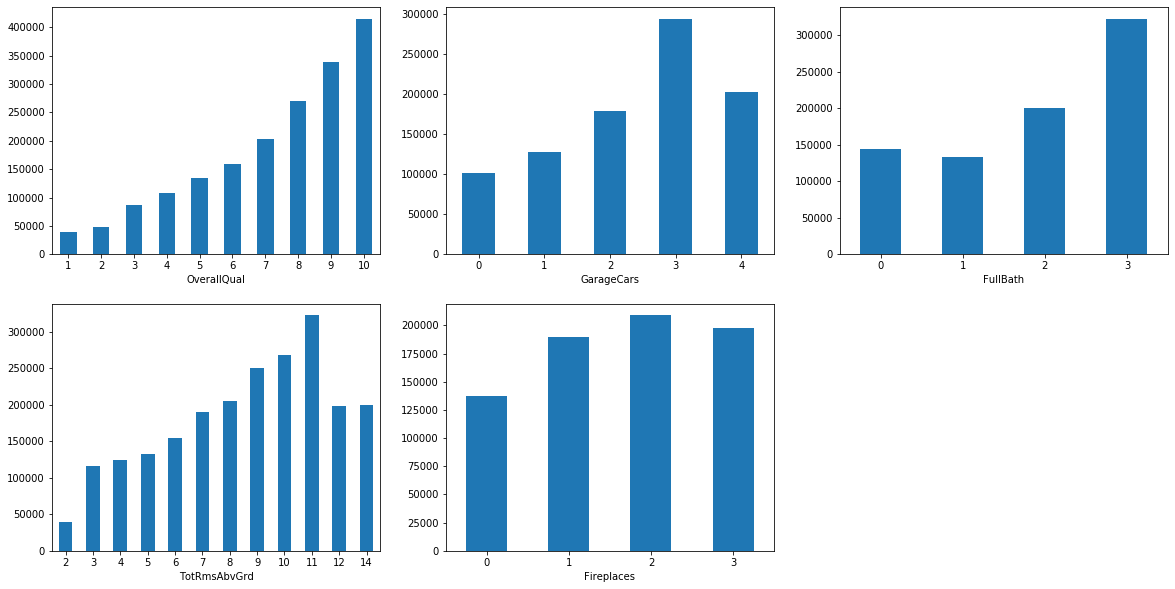

In [14]:
# plot relationship between discrete features and the target  
plt.figure(figsize = (20,10))
for i, ft in enumerate(high_corr_discrete):
    plt.subplot(2, 3, i+1)
    num_target.groupby(ft)['SalePrice'].median().plot(kind = 'bar', rot = 0)
plt.show()

##### The barplots for OverallQual shows a clear increasing trend. This implies that OverallQual is a good predictor. However, GarageCars, TotRmsAbvGrd and Fireplaces all have a dip towards the upper extreme. And FullBath oddly shows higher price for properties with 0 Full Bath. This could have resulted from outliers, let's investigate these 3 features further by looking at the count of each discrete value.

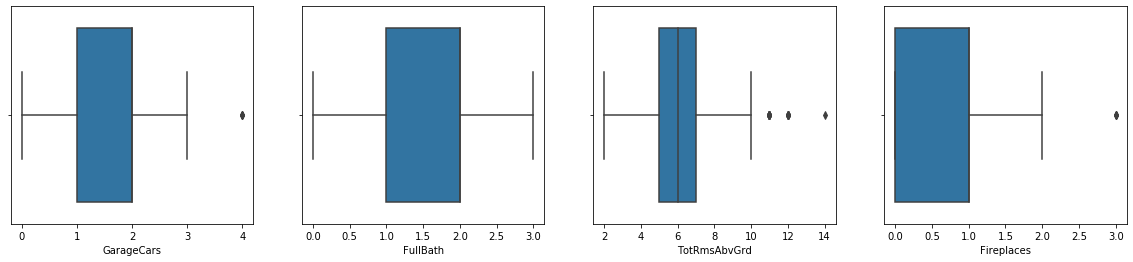

In [15]:
# check the boxplot of each feature
plt.figure(figsize = (20, 4))
plt.subplot(141)
sns.boxplot(num_target.GarageCars)
plt.subplot(142)
sns.boxplot(num_target.FullBath)
plt.subplot(143)
sns.boxplot(num_target.TotRmsAbvGrd)
plt.subplot(144)
sns.boxplot(num_target.Fireplaces)
plt.show()

##### There are some outliers in both GarageCars and TotRmsAbvGrd. Z-score can be applied to validate this finding.

In [16]:
# import zscore function from scipy stats library
from scipy.stats import zscore
# create a new dataframe for storing z-score of GarageCars, TotRmsAbvGrd, Fireplaces
num_zscore = num_target.copy()
num_zscore = num_zscore.assign(TotRmsAbvGrd_zscore = zscore(num_zscore.TotRmsAbvGrd),
                               GarageCars_zscore = zscore(num_zscore.GarageCars),
                               Fireplaces_zscore = zscore(num_zscore.Fireplaces))
# print the suspicious points from the boxplot above
print(num_zscore.loc[num_zscore.TotRmsAbvGrd >= 11,['TotRmsAbvGrd','TotRmsAbvGrd_zscore']])
print(num_zscore.loc[num_zscore.GarageCars == 4,['GarageCars', 'GarageCars_zscore']])
print(num_zscore.loc[num_zscore.Fireplaces == 3,['Fireplaces', 'Fireplaces_zscore']])

      TotRmsAbvGrd  TotRmsAbvGrd_zscore
Id                                     
1351            12             3.352971
528             11             2.737882
1387            12             3.352971
746             11             2.737882
1293            11             2.737882
1299            12             3.352971
12              11             2.737882
1143            11             2.737882
186             12             3.352971
770             12             3.352971
899             11             2.737882
119             11             2.737882
898             12             3.352971
876             11             2.737882
524             11             2.737882
1269            11             2.737882
1231            12             3.352971
636             14             4.583148
1441            11             2.737882
804             12             3.352971
567             11             2.737882
325             11             2.737882
911             12             3.352971


A z-score that is greater than 3 means the observed result is 3 standard deviations away from the mean. This could happen only 0.1% of the time. Thus the points are confirmed to be outliers.

In [17]:
# drop training data whose TotRmsAbvGrd_zscore OR GarageCars_zscore OR Fireplaces_zscore is greater than 3
drop_z_index = num_zscore[(num_zscore.TotRmsAbvGrd_zscore >= 3) | (num_zscore.GarageCars_zscore >= 3) | (num_zscore.Fireplaces_zscore >=3)].index
X_train_full.drop(drop_z_index, inplace= True)
y_train_full.drop(drop_z_index, inplace= True)

#### **Highly correlated Continuous Features**

##### I will start by plotting each one of the continuous features against the target. This will help me identify outliers in these features.

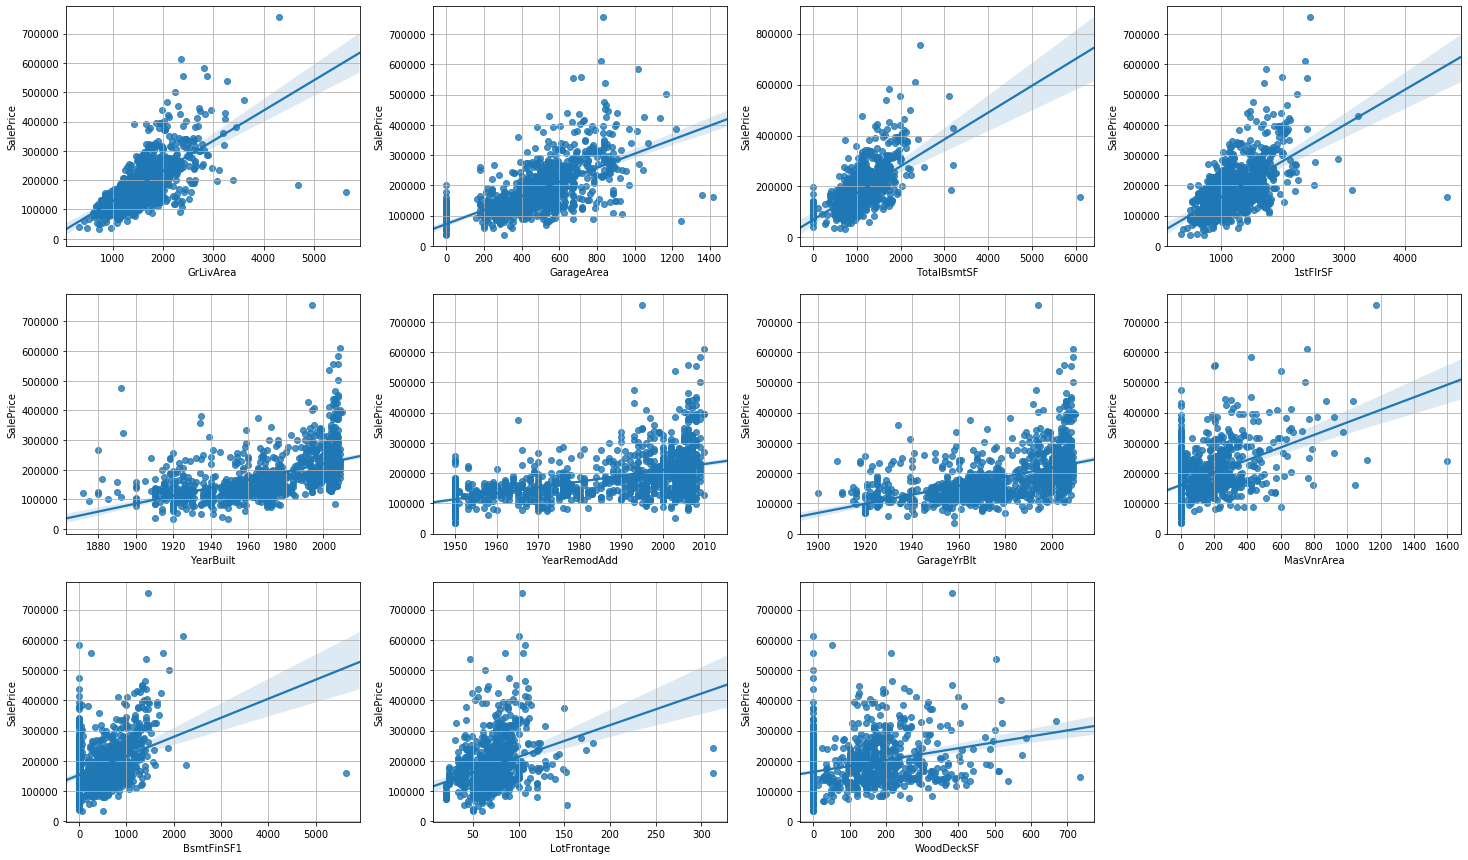

In [18]:
# create a list for storing highly correlated continuous features
high_corr_continuous = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF']
# plot using scatter plot
plt.figure(figsize = (25, 15))
for i, ft in enumerate(high_corr_continuous):
    plt.subplot(3, 4, i+1)
    sns.regplot(num_target[ft], num_target['SalePrice'])
    plt.grid(True)
plt.subplots_adjust(wspace= 0.25)
plt.show()

##### The plots above show some outliers in the lower right corner of GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF. I will simply remove these outliers by inspection. The reason for doing this instead of dropping anything whose z-score is greater than 3 is because I want to keep some noises in my data, while removing the extreme noisy points:
- For GrLivArea: drop if GrLivArea > 4,000 AND SalePrice < 200,000
- For GarageArea: drop if GarageArea > 1,200 AND SalePrice < 200,000
- For TotalBsmtSF, 1stFlrSF, BsmtFinSF1: drop if TotalBsmtSF > 6,000 OR 1stFlrSF > 4000 OR BsmtFinSF1 > 5,000
- For MasVnrArea: drop if MasVnrArea > 1,400
- For LotFrontage: drop if LotFrontage > 300
- For WoodDeckSF: drop if WoodDeckSF> 700

In [19]:
# drop training data based on the above criteria
# set errors = 'ignore' to suppress errors that could arise from referencing previously dropped rows
drop_GrLivArea_index = num_target[(num_target.GrLivArea > 4000) & (num_target.SalePrice < 200000)].index
X_train_full.drop(drop_GrLivArea_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_GrLivArea_index, inplace = True, errors= 'ignore')

drop_GarageArea_index = num_target[(num_target.GarageArea > 1200) & (num_target.SalePrice < 200000)].index
X_train_full.drop(drop_GarageArea_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_GarageArea_index, inplace = True, errors= 'ignore')

drop_Bsmt1stFlr_index = num_target[(num_target.TotalBsmtSF > 6000) | (num_target['1stFlrSF'] > 4000) | (num_target['BsmtFinSF1'] > 5000)].index
X_train_full.drop(drop_Bsmt1stFlr_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_Bsmt1stFlr_index, inplace = True, errors= 'ignore')

drop_MasVnrArea_index = num_target[(num_target.MasVnrArea > 1400)].index
X_train_full.drop(drop_MasVnrArea_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_MasVnrArea_index, inplace = True, errors= 'ignore')

drop_LotFrontage_index = num_target[(num_target.LotFrontage > 300)].index
X_train_full.drop(drop_LotFrontage_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_LotFrontage_index, inplace = True, errors= 'ignore')

drop_WoodDeckSF_index = num_target[(num_target.WoodDeckSF > 700)].index
X_train_full.drop(drop_WoodDeckSF_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_WoodDeckSF_index, inplace = True, errors= 'ignore')

##### After removing the outliers, I will start looking at the missing values and explore potential ways to deal with them.
##### Start by determining the ratio of missing values in each feature.

In [20]:
# create a dataframe to store ratio of Null values
missing_ratio = {'Feature':[], 'Ratio':[]}
missing_ratio['Feature'] = X_train_full.columns
missing_ratio['Ratio'] = np.array(X_train_full.isnull().sum()/X_train_full.shape[0]*100)
# sort datafrane by Ratio in descending order
missing_df = pd.DataFrame(missing_ratio, index = np.arange(len(X_train_full.columns))).sort_values(by= 'Ratio', ascending= False)
# select features whose ratio is not 0
missing_df = missing_df[missing_df.Ratio != 0]

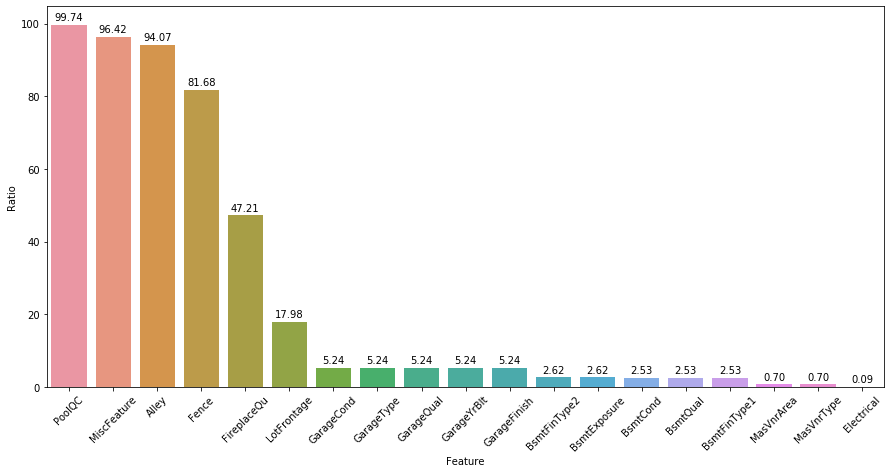

In [21]:
# visualze the dataframe
plt.figure(figsize = (15,7))
ax = sns.barplot(missing_df.Feature, missing_df.Ratio)
# annotate each bar with its height
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 7.5), 
                textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.show()

##### The barplot above shows that there actually aren't that many columns with missing values. Additionally, I noticed that the top 5 features (PoolQC, MiscFeature, Alley, Fence, FireplaceQu) could result from the fact that the property just did not have these amenities. The rest of them could be imputed from other related features. I will focus on imputation in the next section.

In [22]:
# create lists for storing numerical and categorical columns with missing values
missing_num_cols = [col for col in missing_df.Feature if col in num_cols]
missing_cat_cols = [col for col in missing_df.Feature if col in cat_cols]

##### Check if the validation set contains any extra 'missing' features. Extra features from validation set should be imputed as well based on data from the training set.

In [23]:
print([col for col in list(X_val_full.columns[X_val_full.isnull().sum() != 0]) if col not in missing_df.Feature.values])

[]


##### Seems like the validaition is fine. Just in case, I will check if features with missing values in the testing set match the training set.

In [24]:
print([col for col in list(test_data.columns[test_data.isnull().sum() != 0]) if col not in missing_df.Feature.values])

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea']


##### Because there are missing values, I will need to impute these features as well. Note that 'SaleType' will not be considered since it will be dropped due to target leakage reason

In [25]:
# Categorize and add the above features to missing_num_cols and missing_cat_cols
missing_num_cols += ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
missing_cat_cols += ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', ]

print('There are {} umerical columns with missing values:'.format(len(missing_num_cols)))
print(missing_num_cols)
print('\nThere are {} categorical columns with missing values:'.format(len(missing_cat_cols)))
print(missing_cat_cols)

There are 11 umerical columns with missing values:
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

There are 22 categorical columns with missing values:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrType', 'Electrical', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']


### **4). Handling Missing Values & Imputation**
#### **Categorical Features with Missing Values**
##### Continuing from the last section, I will start with the Categorical features since the features with the highest ratio of missing values are categorical. As I mentioned, many features could contain missing values simply becasue it was not offered in some properties. Additionally, the ratios for all features related to Garage are at 5.24, where the ratios for all features releated to Bsmt (Basement) are at either 2.62 or 2.53. This consistency could potentially mean that the null (missing) values for a category (e.g. basement) of features could all come from the same units that did not offer these amenities. 
##### To test the validity of my assumption, I will check the distribution of the features that contain no missing values (Note that this part involves missing features from the training set only:
- PoolArea <---> **_PoolQC_** - *A PoolArea of 0 means no pool*
- MiscVal <---> **_MiscFeature_** - *A MiscVal (value of miscellaneous features) of 0 means no miscellaneous features*
- Fireplaces <---> **_FireplaceQU_** - *A Fireplaces of 0 means no fireplace*
- GarageCars <---> **_GarageCond, GarageType, GarageQual, GarageFinish_** - *A GarageCars of 0 means no garage*
- TotalBsmtSF <---> **_BsmtFinType2, BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1_** - *A TotalBsmtSF of 0 means no basement*


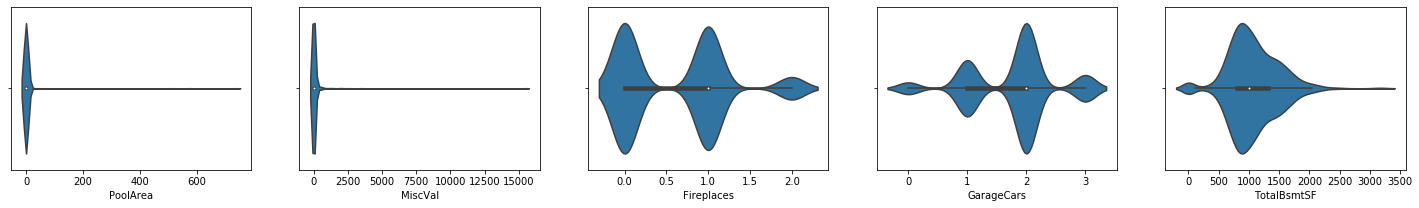

In [26]:
# plot distribution of the above features using violinplot
plt.figure(figsize = (25, 3))
plt.subplot(151)
sns.violinplot(X_train_full.PoolArea)
plt.subplot(152)
sns.violinplot(X_train_full.MiscVal)
plt.subplot(153)
sns.violinplot(X_train_full.Fireplaces)
plt.subplot(154)
sns.violinplot(X_train_full.GarageCars)
plt.subplot(155)
sns.violinplot(X_train_full.TotalBsmtSF)
plt.show()

##### The violinplots above agree with my assumptions (the portion of datapoints at 0 in each plot). Let's find the exact portions and see if they match the barplot shown above.  

In [27]:
print("Percentage of properties with no pools: {:.2%}".format(len(X_train_full.PoolArea[X_train_full.PoolArea == 0]) / X_train_full.shape[0]))
print("Percentage of properties with no miscellaneous features: {:.2%}".format(len(X_train_full.MiscVal[X_train_full.MiscVal == 0]) / X_train_full.shape[0]))
print("Percentage of properties with no fireplaces: {:.2%}".format(len(X_train_full.Fireplaces[X_train_full.Fireplaces == 0]) / X_train_full.shape[0]))
print("Percentage of properties with no garages: {:.2%}".format(len(X_train_full.GarageCars[X_train_full.GarageCars == 0]) / X_train_full.shape[0]))
print("Percentage of properties with no basement: {:.2%}".format(len(X_train_full.TotalBsmtSF[X_train_full.TotalBsmtSF == 0]) / X_train_full.shape[0]))

Percentage of properties with no pools: 99.74%
Percentage of properties with no miscellaneous features: 96.60%
Percentage of properties with no fireplaces: 47.21%
Percentage of properties with no garages: 5.24%
Percentage of properties with no basement: 2.53%


##### As expected, the numbers match perfectly with the barplot shown above. This confirms my assumption where the missing values in these particular features were caused by unavailabilities. More importantly, this finding implies that missing values related to Pool, Miscellaneous Features, Fireplace, Garage, Basement can simply be replaced with 0 or NA. 

##### Moving on to **_Fence_** and **_Alley_**, I will impute these two features with 0 or None again because I am assuming that the features were missing in most of the properties. This should be a valid assumption considering that the percentages of missing values in Alley and Fence are so high (94.07% and 81.68%), and they were unlikely caused by mistakes during data logging process. (Of course, there is a probability that these information were never collected or logged, but I will just assume that the creator of this dataset has done his/her due diligence). Therefore, missing values for these two features will be filled with 0 or NA.

##### For **_MasVnrType_**, I will apply a slightly different thinking. I noticed that the missing value percentages for MasVnrType and MasVnrArea are the same, and it should be reasonable to assume that these missing entries are referring the the same properties, which do not have mansory veneer walls. In other words, if any value is truly unavailable, it would make sense for the two percentages to differ. Thus, missing values for MasVnrType will be filled with 0 or NA.

##### For **_Electrical_**. The missing value percentage for this feature is so low that it should not hurt to just drop this sample. However, I will impute this feature analytically by first looking at its unique values and their counts.

In [28]:
# print unique values
X_train_full.Electrical.value_counts()

SBrkr    1052
FuseA      71
FuseF      19
FuseP       2
Mix         1
Name: Electrical, dtype: int64

##### Electrical refers the deployed surge protection method in these properties. Using domain knowledge, I know that fuses were used in older houses, but SBrkr (circuit break) are used predominantly nowadays as it offers reusability. Let's confirm that by plotting Electrical types against YearBuilt.

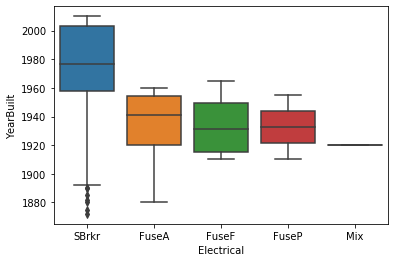

In [29]:
sns.boxplot(X_train_full.Electrical, X_train_full.YearBuilt)
plt.show()

##### The plot matches my expectation, the usage of fuses started dimishing and was replaced by circuit breakers towards year 1960. Before 1960, 'FuseA' has the highest value counts. There, Electrical will be imputed based on 'YearBuilt' feature.

##### The remaining categorical 'missing' features are **_MSZoning, Utilities, Exterior1st, Exterior2nd, Functional and KitchenQual_**. Based on the feature description, these features are not so much of an amenity to a property. Therefore, it would not make sense for them to take on values of 0 nor NA. Instead, they will be imputed based on the most frequent value of each Neighborhood as they can be location dependent. 

#### **Numerical Features with Missing Values**

##### As mentioned earlier, some properties didn not have garages nor mansory veneer walls. Therefore, I will impute **_GarageYrBlt_** and **_MasVnrArea_** with 0.
##### For **_LotFrontage_** (linear feet of street connected to property), it is a pretty important feature because it's moderately correlated with the target. To impute its missing values, I will look at its relationship with Neighborhood. This feature is chosen because the geological location of a dwelling could have certain degree of impact on LotFrontage (Intuitively, a property located in suburb would likely have a greater LotFrontage than one located in downtown)

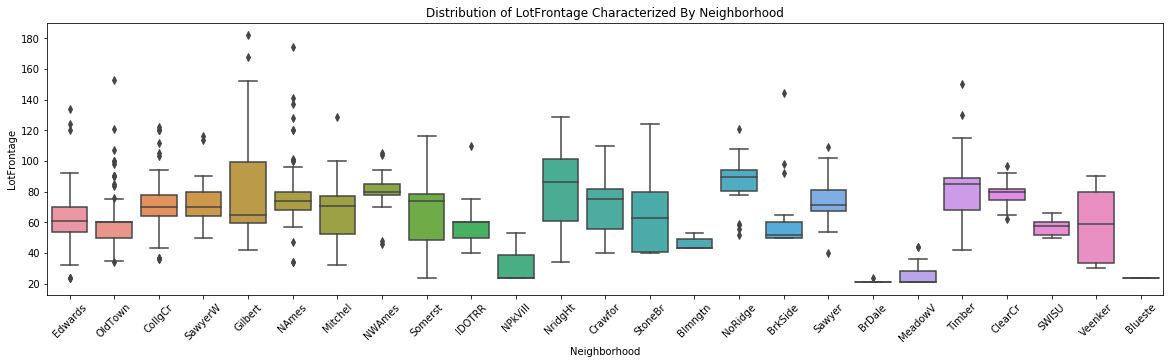

In [30]:
# plot the distribution of LotFrontage Characterized by different MSSubClass and Neighborhood
plt.figure(figsize = (20, 5))
sns.boxplot(X_train_full.Neighborhood, X_train_full.LotFrontage)
plt.xticks(rotation = 45)
plt.title('Distribution of LotFrontage Characterized By Neighborhood')
plt.show()

Neighborhood does seem to offer some degree of distinguishability among its groups. This ensures that it will give some predictive power for LotFrontage

##### Before I start imputing the missing values, there are 1 things to note:
- Imputation needs to be done on training, validation and testing sets. However, data from validation and testing sets should not be used in ordet to prevent overfitting. 

#### In conclusion, imputation will be done in the following ways:
1. Catergorical: all missing categorical features exlcuding 'Electrical', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual' ---> fill with 'NA'
2. 'Electrical' ---> fill with 'SBrkr' if YearBuilt is after 1960, else fill with 'FuseA'
3. 'MSZoning', 'Utilities', Exterior1st', Exterior2nd', 'Functional', 'KitchenQual' ---> fill with the mode of each neighborhood of the training set
4. Numerical: all missing numerical features excluding 'LotFrontage' ---> fill with 0
5. 'LotFrontage' ---> fill with the median of each Neighborhood of the training set

In [31]:
# perform imputation
# impute categorical with 'NA'
missing_cat_cols_short = ['Electrical', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual']
for col in [cat for cat in missing_cat_cols if cat not in missing_cat_cols_short]:
    X_train_full[col].fillna('NA', inplace = True)
    X_val_full[col].fillna('NA', inplace = True)
    test_data[col].fillna('NA', inplace = True)

# impute Electrical with 'SBrkr' or 'FuseA'    
X_train_full.loc[X_train_full.YearBuilt >= 1960, 'Electrical'] = X_train_full.loc[X_train_full.YearBuilt >= 1960, 'Electrical'].fillna(str('SBrkr'))
X_train_full.loc[X_train_full.YearBuilt < 1960, 'Electrical'] = X_train_full.loc[X_train_full.YearBuilt < 1960, 'Electrical'].fillna(str('FuseA'))
X_val_full.loc[X_val_full.YearBuilt >= 1960, 'Electrical'] = X_val_full.loc[X_val_full.YearBuilt >= 1960, 'Electrical'].fillna('SBrkr')
X_val_full.loc[X_val_full.YearBuilt < 1960, 'Electrical'] = X_val_full.loc[X_val_full.YearBuilt < 1960, 'Electrical'].fillna('FuseA')
test_data.loc[test_data.YearBuilt >= 1960, 'Electrical'] = test_data.loc[test_data.YearBuilt >= 1960, 'Electrical'].fillna('SBrkr')
test_data.loc[test_data.YearBuilt < 1960, 'Electrical'] = test_data.loc[test_data.YearBuilt < 1960, 'Electrical'].fillna('FuseA')

# impute with mode
# remove 'Electrical' since it's imputed
missing_cat_cols_short.remove('Electrical')
# create a mapping scheme for missing_cat_cols_short based on Neighborhood
for col in missing_cat_cols_short:
    # create a mapping scheme for missing_cat_cols_short based on Neighborhood
    cat_mode_mapping = X_train_full.groupby('Neighborhood')[col].apply(lambda x: x.mode()[0]).to_dict()
    # impute with mapping training, validation and testing set
    X_train_full.loc[X_train_full[col].isnull(), col] = X_train_full['Neighborhood'].map(cat_mode_mapping)
    X_val_full.loc[X_val_full[col].isnull(), col] = X_val_full['Neighborhood'].map(cat_mode_mapping)
    test_data.loc[test_data[col].isnull(), col] = test_data['Neighborhood'].map(cat_mode_mapping)
    
# impute numerical with 0
for col in [num for num in missing_num_cols if num != 'LotFrontage']:
    X_train_full[col].fillna(0, inplace = True)
    X_val_full[col].fillna(0, inplace = True)
    test_data[col].fillna(0, inplace = True)

# impute with median
# create a mapping scheme for LotFrontage based on Neighborhood
LotFrontage_mapping = X_train_full.groupby('Neighborhood')['LotFrontage'].median().to_dict()
# impute LotFrontage with aggregation on training set 
X_train_full['LotFrontage'] = X_train_full.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# impute with mapping on validation and testing set
X_val_full.loc[X_val_full.LotFrontage.isnull(), 'LotFrontage'] = X_val_full['Neighborhood'].map(LotFrontage_mapping)
test_data.loc[test_data.LotFrontage.isnull(), 'LotFrontage'] = test_data['Neighborhood'].map(LotFrontage_mapping)

### **5). Encoding Categorical Features**

##### Categorical features can gisnulllly be classified as nominal or ordinal. A nominal feature has no intrinsic order to its value, such as different types of dwelling. An ordinal feature does offer some kind of order or ranking (e.g. house quality). These two will need to be dealt with differently during the encoding process.
##### Before I start, I will convert MSSubClass to string values as it is actually categorical.

In [32]:
# convert to object
X_train_full['MSSubClass'] = X_train_full['MSSubClass'].astype('str')
cat_cols += 'MSSubClass'

##### Based on the dataset description provided at the beginning of this notebook, categorical features will be divided in the following ways：

In [33]:
nominal_cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 
                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1',
                    'BsmtFinType2', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature']
ordinal_cat_cols = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
                   'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
                   'PoolQC', 'Fence']

#### **Ordinal Features**
##### I will start with ordinal categorical features. Because values of these features are embedded with order, a mapping will potentially need to be created help with encoding. Before that, let's look at the unique values first:

In [34]:
for col in ordinal_cat_cols:
    print("{:<15}: {}".format(col, sorted(X_train_full[col].unique())))

LotShape       : ['IR1', 'IR2', 'IR3', 'Reg']
Utilities      : ['AllPub', 'NoSeWa']
LandSlope      : ['Gtl', 'Mod', 'Sev']
ExterQual      : ['Ex', 'Fa', 'Gd', 'TA']
ExterCond      : ['Ex', 'Fa', 'Gd', 'Po', 'TA']
BsmtQual       : ['Ex', 'Fa', 'Gd', 'NA', 'TA']
BsmtCond       : ['Fa', 'Gd', 'NA', 'Po', 'TA']
BsmtExposure   : ['Av', 'Gd', 'Mn', 'NA', 'No']
HeatingQC      : ['Ex', 'Fa', 'Gd', 'TA']
Electrical     : ['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr']
KitchenQual    : ['Ex', 'Fa', 'Gd', 'TA']
Functional     : ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ']
FireplaceQu    : ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
GarageFinish   : ['Fin', 'NA', 'RFn', 'Unf']
GarageQual     : ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
GarageCond     : ['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']
PavedDrive     : ['N', 'P', 'Y']
PoolQC         : ['Ex', 'Gd', 'NA']
Fence          : ['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'NA']


##### Based on the output above, I decide to use the same mapping scheme for all ordinal features related to Quality and Condition. The rest will get their own mapping scheme. Also, the dataset description contains information on the true order of each feature. The knowledge  aids the mapping scheme creation. (Note: a smaller number denotes inferiority or Unavailability, a larger number denotes superiority)

In [35]:
# create mapping schemes for encoding 

ordinal_mapping = {
    # mapping ordinal features releated to Quality and Condition
    'QualCond' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    # mapping for remaining ordinal features 
    'LotShape' : {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3},
    'Utilities' : {'NoSeWa': 0, 'AllPub': 1},
    'LandSlope' : {'Sev': 0, 'Mod': 1, 'Gtl': 2},
    'BsmtExposure' : {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'Electrical' : {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4},
    'Functional' : {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
    'GarageFinish' : {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'PavedDrive' : {'N': 0, 'P': 1, 'Y': 2},
    'Fence' : {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
}

In [36]:
# encode ordinal features in training, validation and testing set

# encode ordinal features related to Quality and Condition
QualCond_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
                 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
for col in QualCond_cols:
    X_train_full[col] = X_train_full[col].map(ordinal_mapping['QualCond'])
    X_val_full[col] = X_val_full[col].map(ordinal_mapping['QualCond'])
    test_data[col] = test_data[col].map(ordinal_mapping['QualCond'])

# encode remaining ordinal features    
non_QualCond_ordinal_cols = [col for col in ordinal_cat_cols if col not in QualCond_cols]

for col in non_QualCond_ordinal_cols:
    X_train_full[col] = X_train_full[col].map(ordinal_mapping[col])
    X_val_full[col] = X_val_full[col].map(ordinal_mapping[col])
    test_data[col] = test_data[col].map(ordinal_mapping[col])

In [37]:
# check encoding result
X_train_full[ordinal_cat_cols].head(3)

,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,
922,3,1,2,3,3,3,3,1,4,4,3,7,0,0,0,0,0,0,4
521,3,1,2,3,3,0,0,0,3,3,3,7,0,0,0,0,0,0,0
402,2,1,2,4,3,4,3,3,5,4,4,7,4,3,3,3,2,0,0


#### **Nominal Features**

##### First encode all nominal features. The encoded features can then be used to evaluate feature importance

In [38]:
from category_encoders import OrdinalEncoder
nominal_tgt_encoder = OrdinalEncoder(cols = nominal_cat_cols)
tgt_encoded_nominal_train = nominal_tgt_encoder.fit_transform(X_train_full[nominal_cat_cols])
tgt_encoded_nominal_val = nominal_tgt_encoder.transform(X_val_full[nominal_cat_cols])

In [39]:
# selet best nominal features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

ft_select = SelectKBest(score_func= chi2, k = 'all')

ft_select.fit(tgt_encoded_nominal_train, y_train_full)

SelectKBest(k='all', score_func=<function chi2 at 0x1227f0830>)

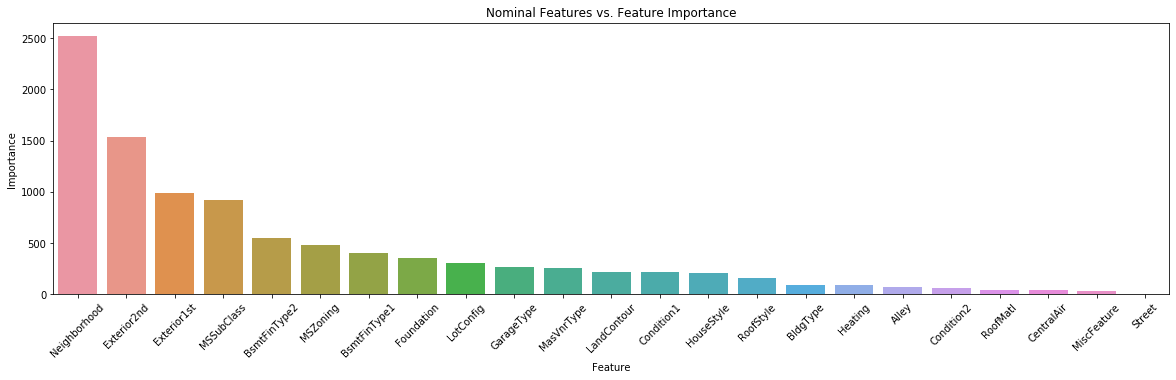

In [40]:
# get feature importance from model trained on target encoded nominal features
nominal_score_df = pd.DataFrame(data = {'Feature': nominal_cat_cols, 'Importance': ft_select.scores_})
nominal_score_df.sort_values(by = 'Importance', ascending = False, inplace = True)
plt.figure(figsize = (20,5))
sns.barplot(nominal_score_df.Feature, nominal_score_df.Importance)
plt.xticks(rotation = 45)
plt.title('Nominal Features vs. Feature Importance')
plt.show()

In [41]:
# Select the top 12 features
top12_nominal_cols = nominal_score_df.Feature[:12].to_list()

# print each features' unique values
for col in top12_nominal_cols:
    print("'{:<12}' {}".format(col, X_train_full[col].unique()))

'Neighborhood' ['Edwards' 'OldTown' 'CollgCr' 'SawyerW' 'Gilbert' 'NAmes' 'Mitchel'
 'NWAmes' 'Somerst' 'IDOTRR' 'NPkVill' 'NridgHt' 'Crawfor' 'StoneBr'
 'Blmngtn' 'NoRidge' 'BrkSide' 'Sawyer' 'BrDale' 'MeadowV' 'Timber'
 'ClearCr' 'SWISU' 'Veenker' 'Blueste']
'Exterior2nd ' ['MetalSd' 'VinylSd' 'Plywood' 'HdBoard' 'Wd Sdng' 'AsphShn' 'Wd Shng'
 'Brk Cmn' 'AsbShng' 'CmentBd' 'ImStucc' 'Stucco' 'BrkFace' 'Stone'
 'CBlock' 'Other']
'Exterior1st ' ['MetalSd' 'VinylSd' 'Plywood' 'HdBoard' 'BrkFace' 'Wd Sdng' 'AsbShng'
 'CemntBd' 'Stucco' 'WdShing' 'CBlock' 'Stone' 'BrkComm' 'ImStucc']
'MSSubClass  ' ['90' '190' '20' '60' '80' '50' '160' '30' '120' '70' '40' '85' '180' '45'
 '75']
'BsmtFinType2' ['Unf' 'NA' 'BLQ' 'Rec' 'LwQ' 'GLQ' 'ALQ']
'MSZoning    ' ['RL' 'FV' 'C (all)' 'RM' 'RH']
'BsmtFinType1' ['ALQ' 'NA' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ']
'Foundation  ' ['CBlock' 'BrkTil' 'PConc' 'Stone' 'Slab' 'Wood']
'LotConfig   ' ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
'GarageType  ' ['NA' 'Attchd' 

In [42]:
# apply one-hot encoding to these features
from category_encoders import OneHotEncoder

OH_encoder = OneHotEncoder(cols = top12_nominal_cols, use_cat_names = True)

X_train_full = X_train_full.join(OH_encoder.fit_transform(X_train_full[top12_nominal_cols]))
X_train_full.drop(top12_nominal_cols, axis = 1, inplace = True)

X_val_full = X_val_full.join(OH_encoder.transform(X_val_full[top12_nominal_cols]))
X_val_full.drop(top12_nominal_cols, axis = 1, inplace = True)

test_data = test_data.join(OH_encoder.transform(test_data[top12_nominal_cols]))
test_data.drop(top12_nominal_cols, axis = 1, inplace = True)

In [ ]:
### **5). Encoding Categorical Features**

##### For simplicity, I will use one hot encoder to encode all nominal vlaues regardless of the values. This will help me evalutate the model performance and compare it with the baseline model.

In [40]:
# import library requried to perform one hot encoder
from category_encoders import OneHotEncoder
# creater an one hot encoder object
test_OH_encoder = OneHotEncoder(use_cat_names= True)
# encode the training set
X_train_OH = X_train_full.copy()
X_train_OH = X_train_OH.join(test_OH_encoder.fit_transform(X_train_OH[nominal_cat_cols]))
X_train_OH.drop(nominal_cat_cols, axis = 1, inplace = True)
# encode the testing set
X_val_OH = X_val_full.copy()
X_val_OH = X_val_OH.join(test_OH_encoder.transform(X_val_OH[nominal_cat_cols]))
X_val_OH.drop(nominal_cat_cols, axis = 1, inplace = True)

In [41]:
# train this simple model and evaluatei it
test_outsample_error, test_insample_error, test_model = score_bl(X_train_OH, X_val_OH, y_train_full, y_val_full)
# print out-of-sample and in-sample prediction errors
print('Out-of-Sample mean-absolute-error is: {}'.format(test_outsample_error))
print('In-Sample mean-absolute-error is: {}'.format(test_insample_error))

[20:12:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Out-of-Sample mean-absolute-error is: 13836.697640196919
In-Sample mean-absolute-error is: 5149.00749209206


##### The Out-of-Sample error is now a lot lower than the baseline model and the In-Sample error is significant improved. This suggests that the the feature engineering I have done so far is doing its job. However, the model is overfitting by quite a lot. This makes sense since all nominal features were one-hot encoded, which drastically incressed the feature size. Additionally, I have not yet perform feature selection, which should theoritically remove redundant feature and select more informative ones. This will further enhance the model robustness.

### Make predictions on Test set, and submit to Kaggle
### Preprocessing of test data

In [42]:
# make prediction on test data
preds_test = test_model.predict(test_data_test)

output = pd.DataFrame({'Id': test_data.index,
                       'SalePrice': preds_test})
# create csv file for submission to Kaggle
output.to_csv('submission_20191208.csv', index=False)

We can see that the result of Pearson Correlation confirms the correlation of numerical features we have selected. On top of that, the P-values are all close to 0 and well below 0.05, which indicates the correlations are highly statistically significant.
The next step would be to check if any two features above are highly correlated. Two highly correlated features might carry duplicated information, such as speed in m/s vs speed in miles/hr. In these cases, we might consider dropping one of them.

In [43]:
# corr_ft = X[high_corr_ft].corr()

# plt.figure(figsize= (12, 12))
# sns.heatmap(corr_ft, annot= True, square= True)
# plt.xticks(rotation = 45)
# plt.show()

Using the heatmap above, we can better visualize the correlations between each predictor feature. 
There are couple highly correlated predictor features:
1. 1stFirSF (First Floor square feet) vs. TotalBsmtSF (Total square feet of basement area)
2. TotRmsAbvGrd (total rooms above ground, excluding bathrooms) vs. GrLivArea (Above ground living area square feet)
3. GarageYrBlt (Year garage was built) vs. YearBuilt (Original construction date)
4. GarageArea (Size of garage in square feet) vs. GarageCars (Size of garage in car capcity)

The high correlations among these 4 pairs of predictor features do seem quite intuitive. And we can definitely agree that some of them are conveying similar information. For example, GarageArea and GarageCars are both used to gauge a garage size. 

In terms of deciding which predictor feature to drop: 
1. I will keep the 4 predictor features in the first 2 pairs because I think they are all important attributes for evaluating a house price despite their similarity and high correlation.
2. For the 3rd pair, GarageYrBlt will be dropped since it has a lower correlation with the target.
3. For the 4th pair, GarageCars will be kept because it is a more intuitive and easier way to describe a garage size another person.